In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from plotnine import *
import itertools
#from nilearn import image, plotting, datasets
#import nibabel as nib
import pdb
import os
import warnings
warnings.filterwarnings("ignore")

In [3]:
model_type = ['random','imagenet_noface', 'imagenet_oneface',
'imagenet_vggface', 'vggface_oneobject', 'vggface']


seed = 1
curr_dir = '/user_data/vayzenbe/GitHub_Repos/ginn'
results_dir = f'{curr_dir}/results'
suf = '_unsupervised'

In [51]:
"""
Plot classification mean data
"""
exp = 'classify'
summary_df = pd.DataFrame(columns = ['model','image_type', 'condition', 'acc', 'se'])

cond = ['upright','inverted']
test_type = ['objects', 'faces']
layer = 'avgpool'
suf = '_unsupervised'

for mm in model_type:
    for tt in test_type:
        for cc in cond:
            
            curr_df = pd.read_csv(f'{results_dir}/{exp}/cornet_z_{mm}_{layer}_{tt}_{cc}{suf}.csv')
            curr_data = pd.Series([mm,tt,cc, curr_df['acc'].mean(), curr_df['acc'].sem()],
                                    index = summary_df.columns)
            summary_df = summary_df.append(curr_data, ignore_index=True)

            #summary_df = pd.concat([summary_df, curr_data])
summary_df['acc'] = summary_df['acc'].astype(float)
summary_df['se'] = summary_df['se'].astype(float)

summary_df['condition'] = pd.Categorical(summary_df['condition'], categories = cond, ordered = False)
summary_df['image_type'] = pd.Categorical(summary_df['image_type'], categories = test_type, ordered = False)
summary_df['model'] = pd.Categorical(summary_df['model'], categories = model_type, ordered = False)


#plot = ggplot(summary_df, aes(x = 'model', y = 'acc', fill = 'image_type')) + geom_col(stat='identity', position='dodge') + \
#     lims(y=(0, .5))

plot = ggplot(summary_df, aes(x = 'model', y = 'acc', color = 'condition')) + \
    geom_linerange(aes(x='model',  ymax = 'acc + se', ymin = 'acc - se', linetype = 'image_type'), size = 1,position=position_dodge2(width=.5)) + \
    geom_point(aes(shape = 'image_type'), size = 4, fill = 'White', stroke = 1,position=position_dodge2(width=.5)) + \
    geom_hline(yintercept=.03, linetype = 'dashed') + theme_classic() + xlab('Model Type') + ylab('Classification Accuracy') + \
            theme(text = element_text(color ='black'), axis_text_x= element_text(angle = 30, size = 12),axis_text_y= element_text(size = 12),axis_title=element_text(size = 14),
                                                                            axis_line=element_line(), 
                                                                            panel_border=element_blank(),
                                                                            figure_size = (10, 5))

print(plot)

FileNotFoundError: [Errno 2] No such file or directory: '/user_data/vayzenbe/GitHub_Repos/ginn/results/classify/cornet_z_random_objects_avgpool_upright_unsupervised.csv'

cropped_face


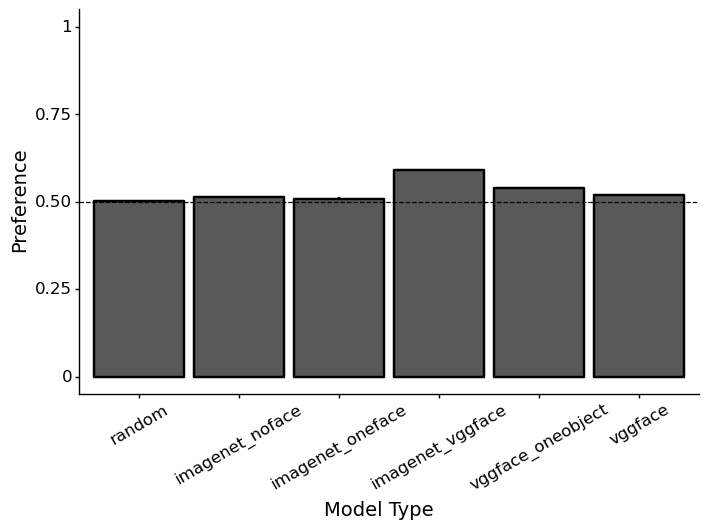


schematic


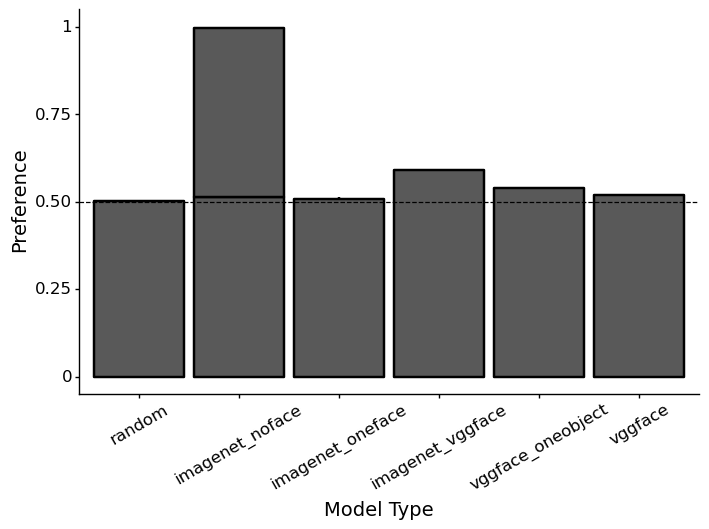

In [49]:
"""
Plot inversion preference mean data
"""
exp = 'inversion_pref'
summary_df = pd.DataFrame(columns = ['model', 'pref', 'ci_low', 'ci_high'])

cond = ['upright','inverted']
test_type = ['cropped_face','schematic']
suf = ''

for tt in test_type:
    for mm in model_type:
    
    
        curr_df = pd.read_csv(f'{results_dir}/{exp}/cornet_z_{mm}_{tt}{suf}.csv')
        curr_df = curr_df.loc[curr_df['test_stim'] == tt]
        
        curr_data = pd.Series([mm,curr_df['pref'], curr_df['ci_high'],curr_df['ci_low'] ],
                                index = summary_df.columns)
        summary_df = summary_df.append(curr_data, ignore_index=True)

        #summary_df = pd.concat([summary_df, curr_data])

    summary_df['pref'] = summary_df['pref'].astype(float)
    summary_df['ci_high'] = summary_df['ci_high'].astype(float)
    summary_df['ci_low'] = summary_df['ci_low'].astype(float)

    #summary_df['condition'] = pd.Categorical(summary_df['condition'], categories = cond, ordered = False)
    summary_df['model'] = pd.Categorical(summary_df['model'], categories = model_type, ordered = False)
    print(tt)

    plot = ggplot(summary_df, aes(x = 'model', y = 'pref')) + \
            geom_linerange(aes(x='model',  ymax = 'ci_high', ymin = 'ci_low'), size = 1) + \
            geom_col(stat='identity', size = 1, color = 'Black') + ylim(0,1) + \
            geom_hline(yintercept=.5, linetype = 'dashed') + theme_classic() + xlab('Model Type') + ylab('Preference') + \
            theme(text = element_text(color ='black'), axis_text_x= element_text(angle = 30, size = 12),axis_text_y= element_text(size = 12),axis_title=element_text(size = 14),
                                                                            axis_line=element_line(), 
                                                                            panel_border=element_blank(),
                                                                            figure_size = (8, 5))

    print(plot)
    del plot

In [11]:
curr_df

,model_arch,train_type,test_stim,pref,ci_low,ci_high
0,cornet_z,random,cropped_face,0.502976,0.50511,0.50168
